In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [23]:
data = pd.read_csv('data/clean-data.csv', index_col=False)
data.drop('Unnamed: 0',axis=1, inplace=True)
array = data.values
X = array[:,1:31]
y = array[:,0]
le = LabelEncoder()
y = le.fit_transform(y)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data.drop('diagnosis',axis=1))
scaled_features=scaler.transform(data.drop('diagnosis',axis=1))

In [25]:
data_feat=pd.DataFrame(scaled_features,columns=data.columns[1:])

# Applying KNN Model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

# Prediction and Evaluation

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print((classification_report(y_test,pred)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       105
           1       0.92      0.88      0.90        66

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [32]:
print(confusion_matrix(y_test,pred))

[[100   5]
 [  8  58]]


# Choosing a K value

In [33]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0.5, 0, 'K')

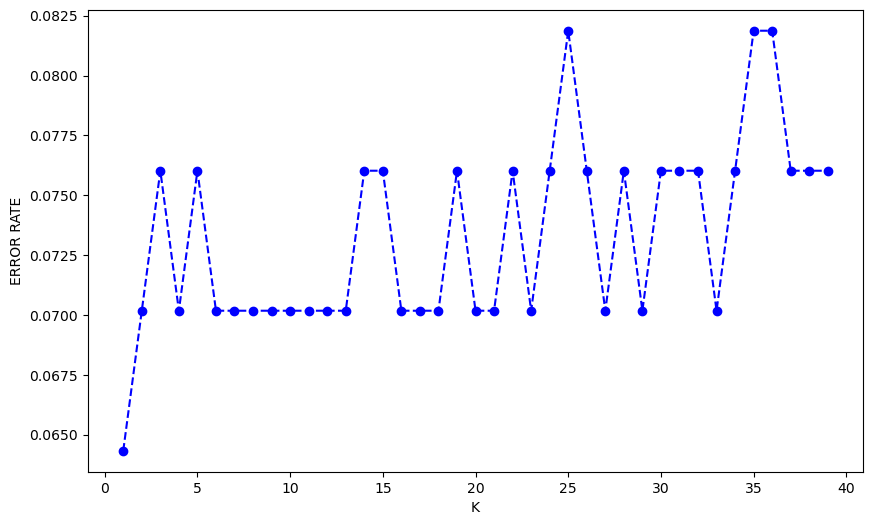

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o')
plt.ylabel('ERROR RATE')
plt.xlabel('K')

In [35]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print((classification_report(y_test,pred)))

[[101   4]
 [  8  58]]


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.94      0.88      0.91        66

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



In [36]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = knn.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
  print('The Women have Benign (Not Cancerous) -Absent in Breast')
else:
  print('The Women have Malignant (Cancerous) - Present in Breast')



[1]
The Women have Malignant (Cancerous) - Present in Breast


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

C:\Users\shaki\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Prediction and Evaluation

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.93      0.86      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



In [41]:
confusion_matrix(y_test,predictions)

array([[101,   4],
       [  9,  57]], dtype=int64)

In [42]:
input_data = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = logmodel.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
  print('The Women have Benign (Not Cancerous) -Absent in Breast')
else:
  print('The Women have Malignant (Cancerous) - Present in Breast')

[1]
The Women have Malignant (Cancerous) - Present in Breast
